In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Etapa 1:

# 1. Carga de Datos y Librerías
# Cargar el dataset
df = pd.read_csv('Churn_Modelling.csv')

# Mostrar las primeras filas
print("Primeras 5 filas del DataFrame:")

print(df.head())

print("--------------------------------------------------------------------")

# Mostrar información general del DataFrame
print("\nInformación del DataFrame:")

print(df.info())


print("--------------------------------------------------------------------")

# 2. Limpieza de Datos

# Verificar y eliminar duplicados
print(f"\nNúmero de filas duplicadas antes de eliminar: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Número de filas duplicadas después de eliminar: {df.duplicated().sum()}")

# Eliminar columnas irrelevantes
columnas_a_eliminar = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columnas_a_eliminar, axis=1, inplace=True)

print("\nDataFrame después de eliminar columnas irrelevantes:")
print(df.head())

Primeras 5 filas del DataFrame:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         

In [3]:

print("Primeras 5 filas del DataFrame:")

df.head()

Primeras 5 filas del DataFrame:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print("\nInformación del DataFrame:")

df.info()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB



Estadísticas descriptivas de variables numéricas:
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45

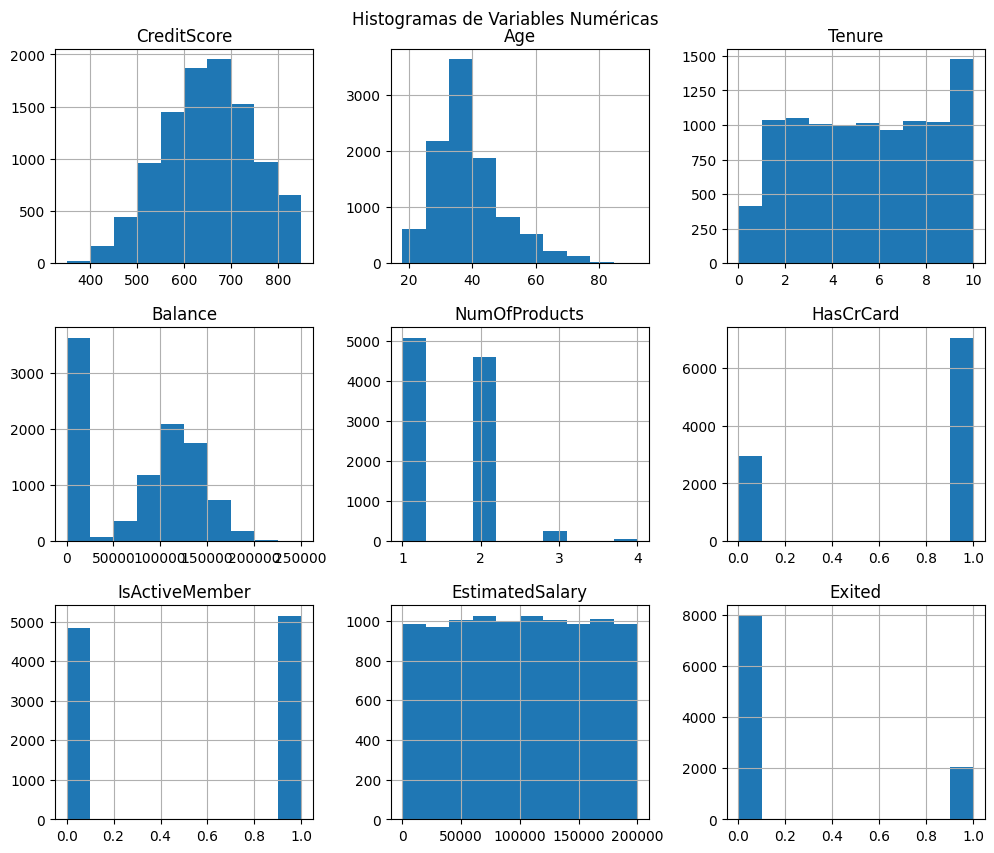

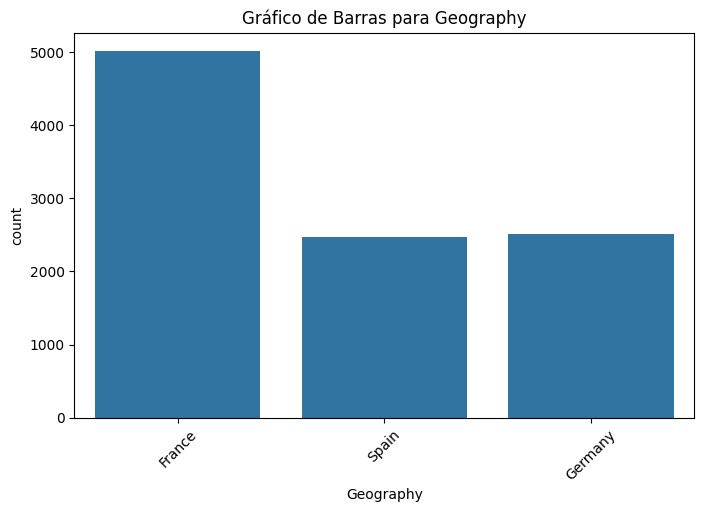

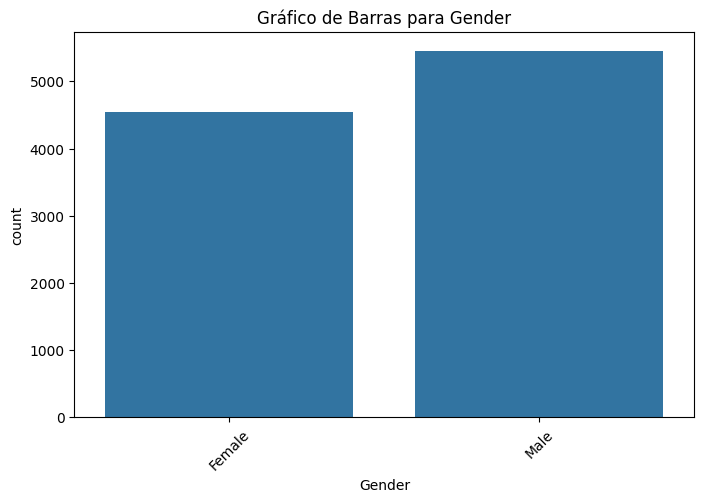

In [5]:

# Etapa 2: Análisis Descriptivo

# 1. Estadísticas Descriptivas

# Variables numéricas
print("\nEstadísticas descriptivas de variables numéricas:")
print(df.describe())

# Variables categóricas
print("\nFrecuencia de variables categóricas:")
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nColumna: {columna}")
    print(df[columna].value_counts())

# 2. Análisis Univariado

# Visualización de variables numéricas
df.hist(figsize=(12, 10))
plt.suptitle("Histogramas de Variables Numéricas", y=0.92)
plt.show()

# Visualización de variables categóricas
for columna in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=columna)
    plt.title(f"Gráfico de Barras para {columna}")
    plt.xticks(rotation=45)
    plt.show()

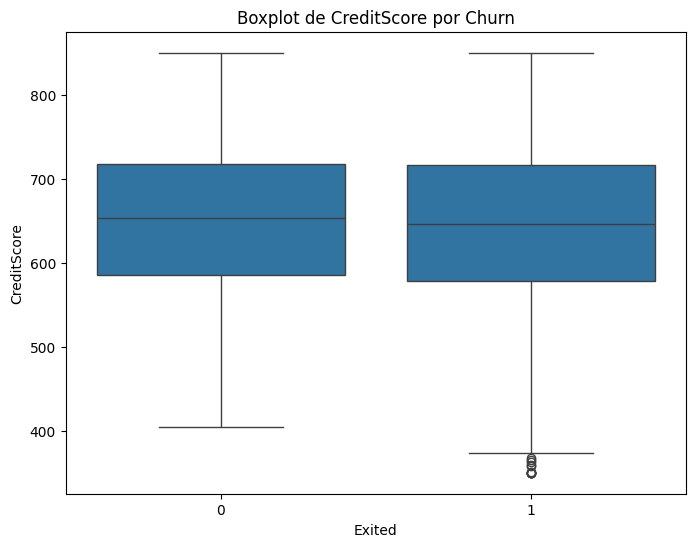

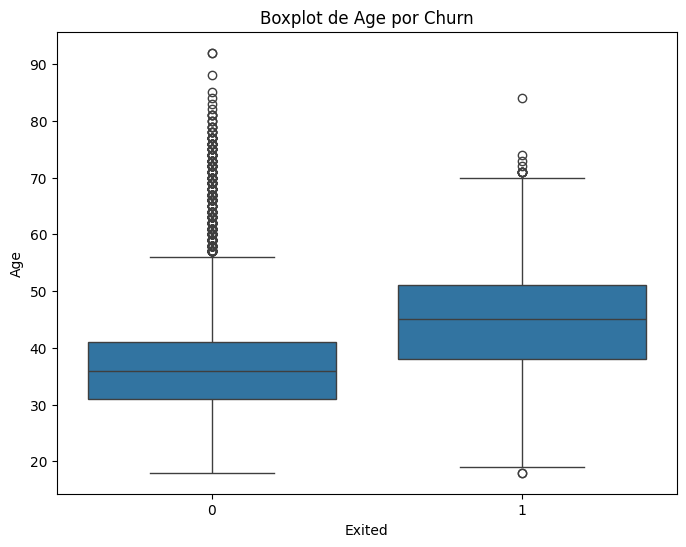

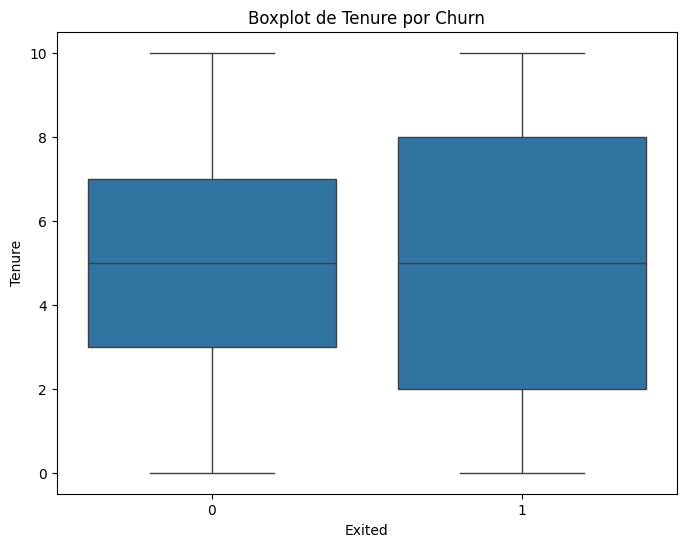

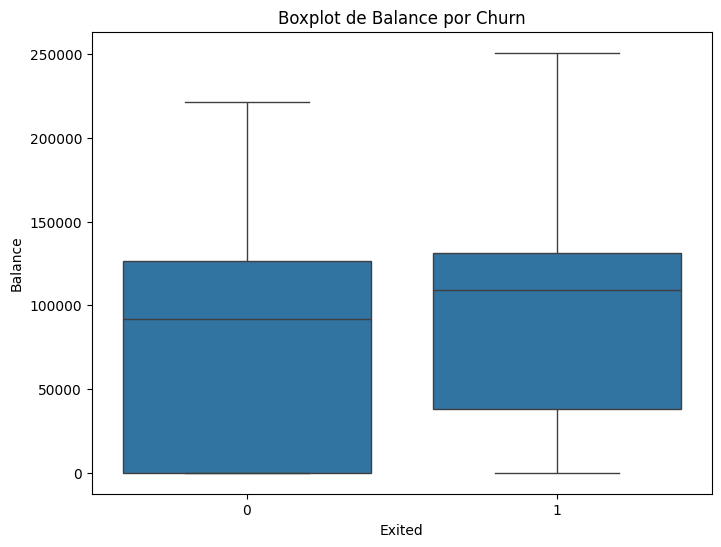

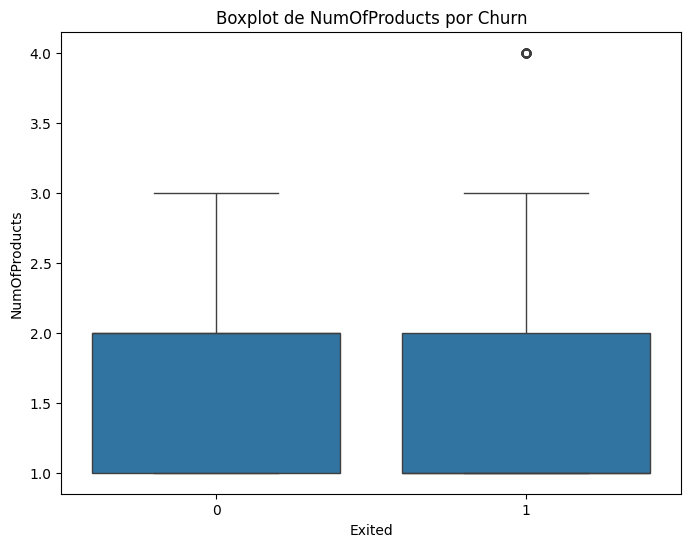

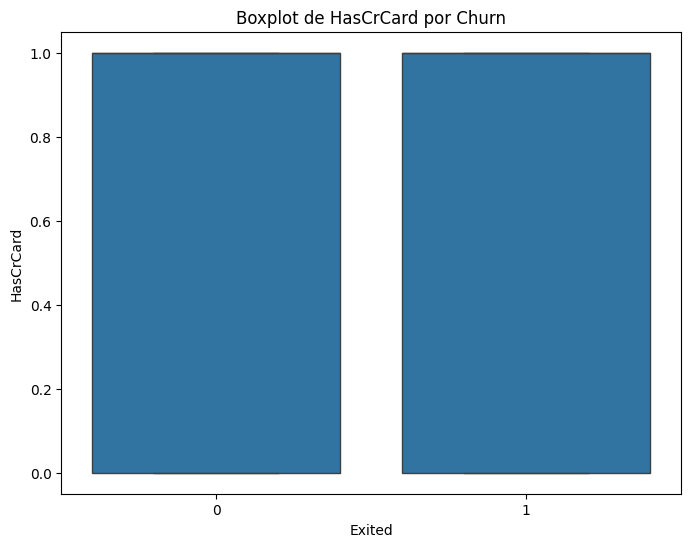

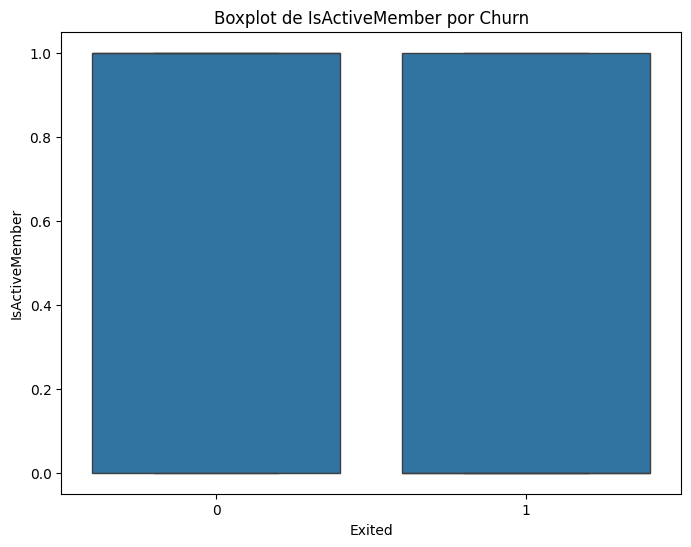

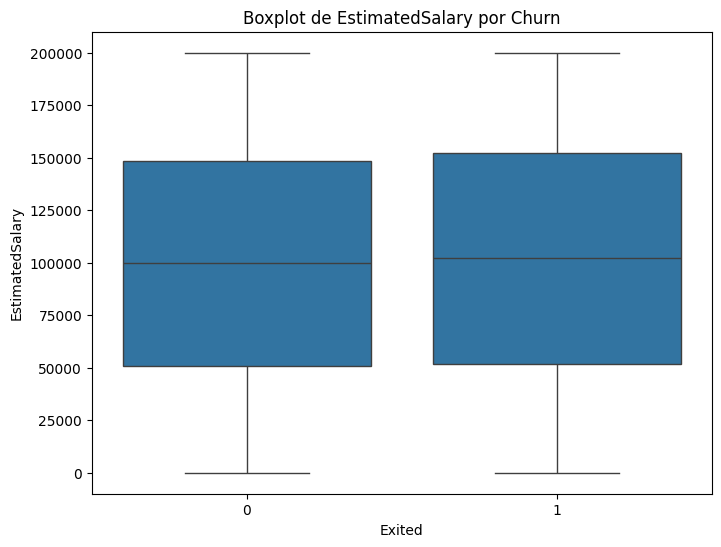

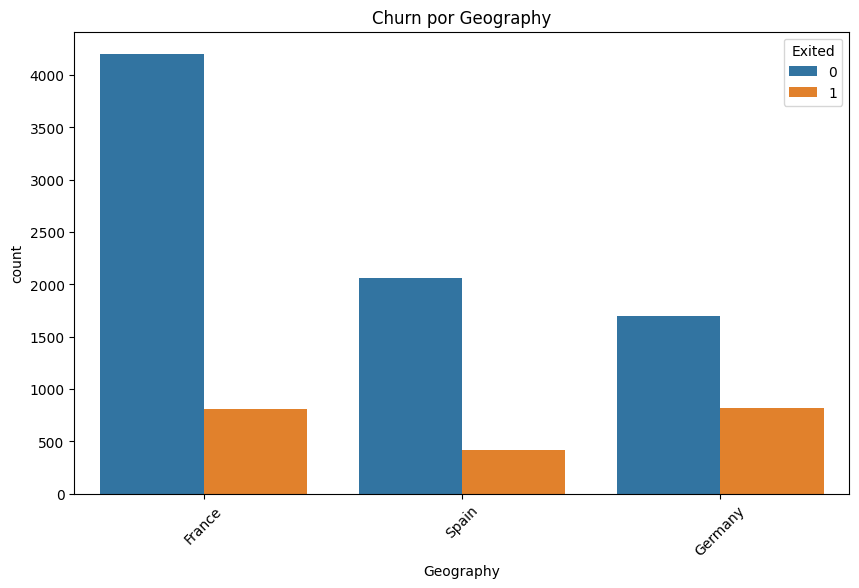


Tasa de Churn por Geography:
Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


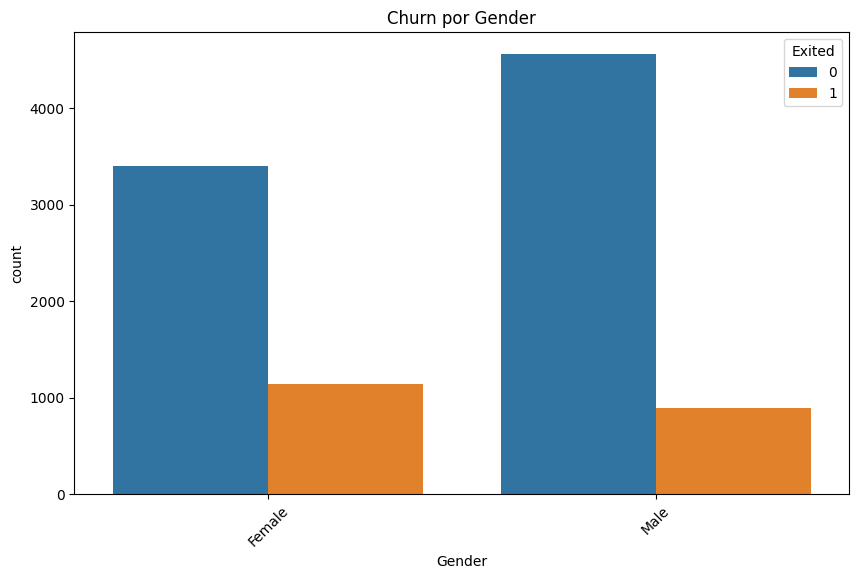


Tasa de Churn por Gender:
Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64


In [6]:
# Etapa 3: Análisis Bivariado

# 1. Variables Numéricas vs. Churn

# Boxplots para comparar distribuciones de variables numéricas por Exited
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
variables_numericas.remove('Exited')  # Excluimos la variable objetivo

for columna in variables_numericas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Exited', y=columna, data=df)
    plt.title(f'Boxplot de {columna} por Churn')
    plt.show()

# 2. Variables Categóricas vs. Churn

# Gráficos de barras para visualizar la tasa de churn por categoría
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()

for columna in variables_categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=columna, hue='Exited', data=df)
    plt.title(f'Churn por {columna}')
    plt.xticks(rotation=45)
    plt.show()

    # Calcular y mostrar la tasa de churn por categoría
    tasa_churn = df.groupby(columna)['Exited'].mean() * 100
    print(f'\nTasa de Churn por {columna}:\n{tasa_churn}')


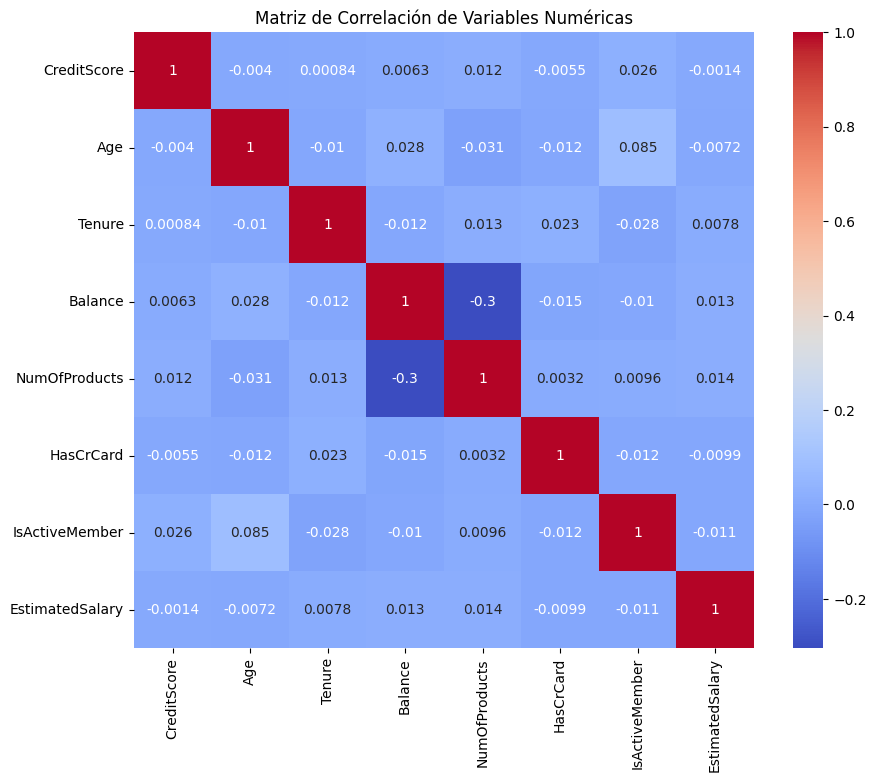

In [7]:
# Etapa 4: Análisis de Correlación y Visualizaciones Interactivas

# 1. Matriz de Correlación

# Calcular la matriz de correlación
matriz_correlacion = df[variables_numericas].corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


# 2. Visualizaciones Interactivas (Ejemplo: Age vs. Balance vs. Exited)

fig = px.scatter(df, x='Age', y='Balance', color='Exited',
                  title='Relación entre Edad, Saldo y Churn',
                  labels={'Exited': 'Churn'})
fig.show()


In [8]:
# Etapa 5: Modelado Básico (Opcional)

# Import ColumnTransformer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


# 1. Preparación de Datos para Modelado

# a) Codificar variables categóricas y escalar variables numéricas

# Identificar variables numéricas y categóricas
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Excluir la variable objetivo 'Exited' de las variables numéricas
variables_numericas.remove('Exited')

# Crear un ColumnTransformer para aplicar transformaciones diferentes a columnas diferentes

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),  # Escalar variables numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), variables_categoricas)  # Codificar variables categóricas
    ])

# b) Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop('Exited', axis=1)  # Características (Features)
y = df['Exited']  # Variable objetivo (Target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test
# Crear un Pipeline que primero transforma los datos y luego entrena el modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar el preprocesamiento a los conjuntos de entrenamiento y prueba
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Imprimir la forma de los datos preprocesados
print("Forma de X_train_processed:", X_train_processed.shape)
print("Forma de X_test_processed:", X_test_processed.shape)

Forma de X_train_processed: (8000, 13)
Forma de X_test_processed: (2000, 13)


Accuracy: 0.7195

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000



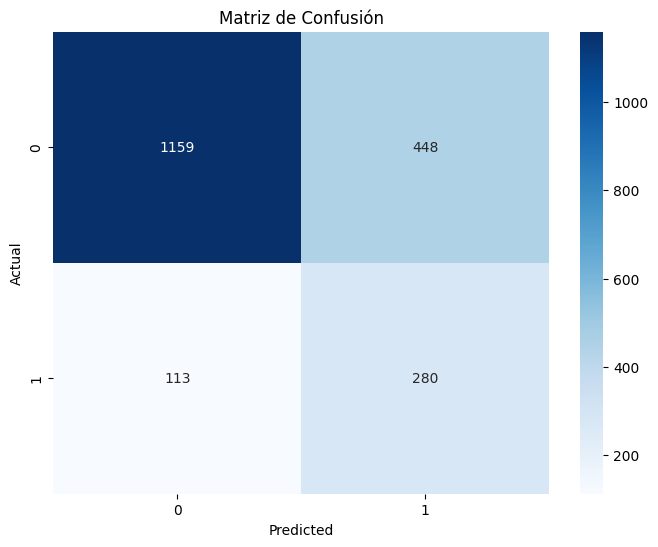

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Etapa 5: Modelado Básico (Opcional)

# 2. Construcción y Evaluación del Modelo

# a) Entrenar un modelo de clasificación (Regresión Logística)
# Agregar el modelo de Regresión Logística al Pipeline
pipeline.steps.append(('classifier', LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')))

# Entrenar el Pipeline (preprocesamiento + modelo)
pipeline.fit(X_train, y_train)

# b) Evaluar el rendimiento del modelo

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular y mostrar métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Etapa 6: Conclusiones y Hallazgos

# 1. Resumen de Hallazgos Clave

print("\n--- Resumen de Hallazgos Clave ---")

# Tasa de Churn General
tasa_churn_general = df['Exited'].mean() * 100
print(f"\nLa tasa de churn general observada es del {tasa_churn_general:.2f}%.")

# Factores Clave Asociados con el Churn (basado en análisis previo)
print("\nFactores Clave Asociados con el Churn:")

# Geography
print("\n- Geografía: Alemania presenta la tasa de churn más alta.")
print(df.groupby('Geography')['Exited'].mean() * 100)

# Gender
print("\n- Género: Las clientas (Female) muestran una tasa de churn más alta que los clientes masculinos.")
print(df.groupby('Gender')['Exited'].mean() * 100)

# IsActiveMember
print("\n- Actividad del Cliente: Los miembros inactivos tienen una tasa de churn significativamente mayor.")
print(df.groupby('IsActiveMember')['Exited'].mean() * 100)

# NumOfProducts
print("\n- Número de Productos: La relación con el churn es no lineal. Clientes con 1 o 3-4 productos tienden a tener mayor churn.")
print(df.groupby('NumOfProducts')['Exited'].mean() * 100)

# Age
print("\n- Edad: Los clientes de mediana edad muestran una mayor propensión al churn (observado en boxplots).")

# Balance
print("\n- Saldo en Cuenta: Clientes con saldo 0 tienen una propensión elevada al churn (observado en histograma y boxplots).")

# Modelo de Churn
print("\n- Modelo de Churn (Regresión Logística):")
print(f"  - Accuracy en el conjunto de prueba: {accuracy:.4f}")
print("  - El modelo muestra un rendimiento desequilibrado, con mejor precisión para predecir clientes que no abandonan.")
print("  - El modelo tiene dificultades para predecir con precisión a los clientes que sí abandonan (baja precisión para la clase 1).")

# 2. Conclusiones y Próximos Pasos

print("\n--- Conclusiones y Próximos Pasos ---")

print("\n- El análisis exploratorio revela patrones importantes relacionados con el churn.")
print("- La modelización inicial sugiere que se pueden construir modelos para predecir el churn, pero se requiere un mayor ajuste para mejorar el rendimiento, especialmente para la clase minoritaria.")

print("\nPróximos Pasos:")
print("\n  - Explorar modelos más avanzados (Random Forest, Gradient Boosting) para mejorar la precisión de la predicción de churn.")
print("  - Realizar ingeniería de características para crear nuevas variables que capturen mejor las interacciones entre las variables existentes.")
print("  - Recolectar datos adicionales que puedan ser relevantes para el churn (por ejemplo, interacciones de los clientes con el banco, quejas, etc.).")
print("  - Implementar estrategias de retención específicas para los segmentos de clientes identificados como de alto riesgo.")


--- Resumen de Hallazgos Clave ---

La tasa de churn general observada es del 20.37%.

Factores Clave Asociados con el Churn:

- Geografía: Alemania presenta la tasa de churn más alta.
Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

- Género: Las clientas (Female) muestran una tasa de churn más alta que los clientes masculinos.
Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64

- Actividad del Cliente: Los miembros inactivos tienen una tasa de churn significativamente mayor.
IsActiveMember
0    26.850897
1    14.269074
Name: Exited, dtype: float64

- Número de Productos: La relación con el churn es no lineal. Clientes con 1 o 3-4 productos tienden a tener mayor churn.
NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
Name: Exited, dtype: float64

- Edad: Los clientes de mediana edad muestran una mayor propensión al churn (observado en boxplots).

- Saldo en Cuenta: Clientes con


--- Análisis Detallado de Balance = 0 ---

Número de clientes con Balance = 0: 3617

Porcentaje del total de clientes:
36.17

Estadísticas descriptivas de clientes con Balance = 0:
       CreditScore          Age       Tenure  Balance  NumOfProducts  \
count  3617.000000  3617.000000  3617.000000   3617.0    3617.000000   
mean    649.452861    38.434891     5.071330      0.0       1.784628   
std      96.158798    10.492002     2.860781      0.0       0.496455   
min     350.000000    18.000000     0.000000      0.0       1.000000   
25%     583.000000    31.000000     3.000000      0.0       1.000000   
50%     651.000000    37.000000     5.000000      0.0       2.000000   
75%     717.000000    43.000000     7.000000      0.0       2.000000   
max     850.000000    88.000000    10.000000      0.0       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary       Exited  
count  3617.000000     3617.000000      3617.000000  3617.000000  
mean      0.716616        0.517832 

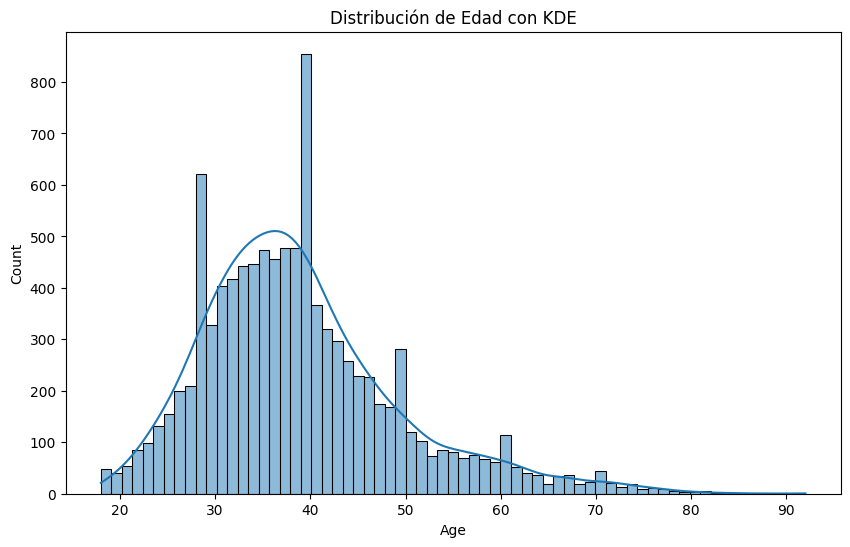

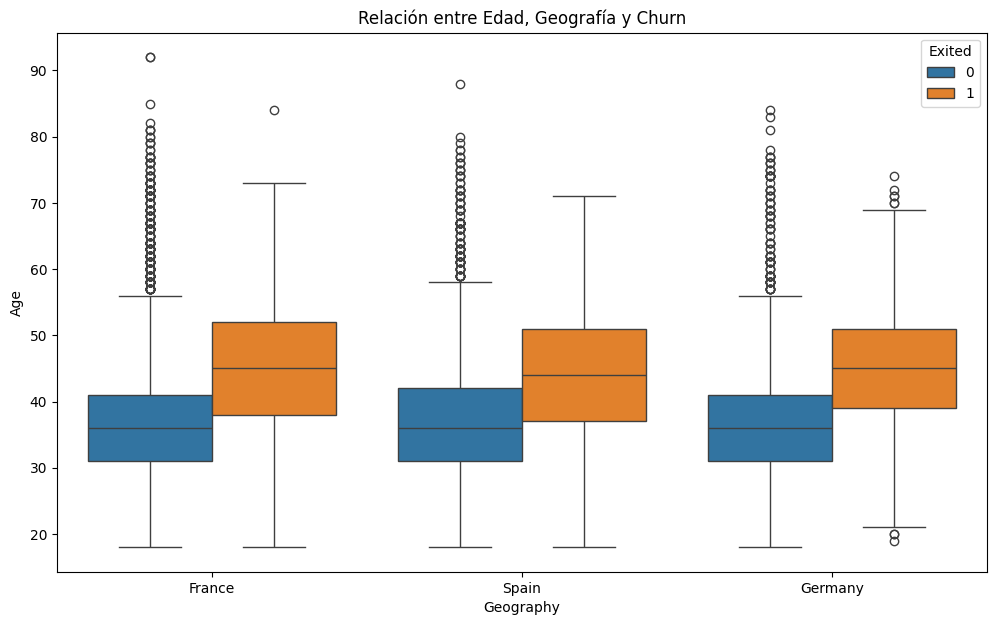

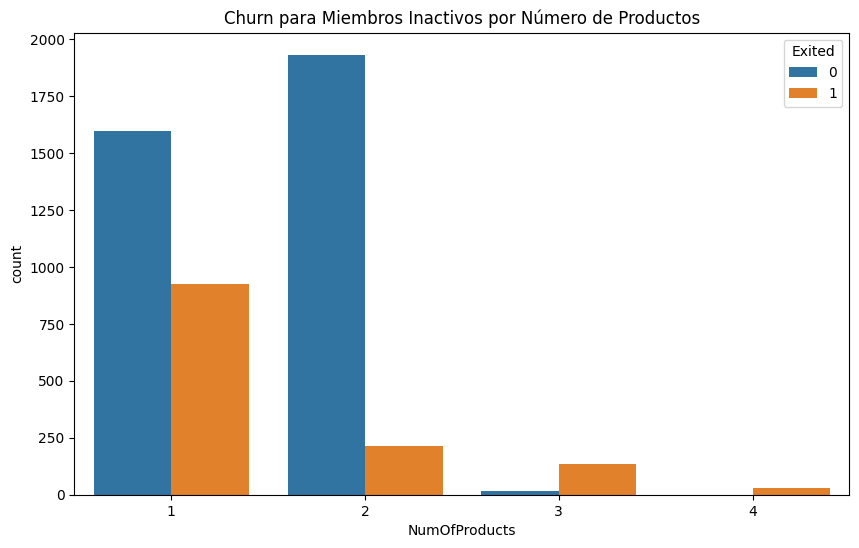

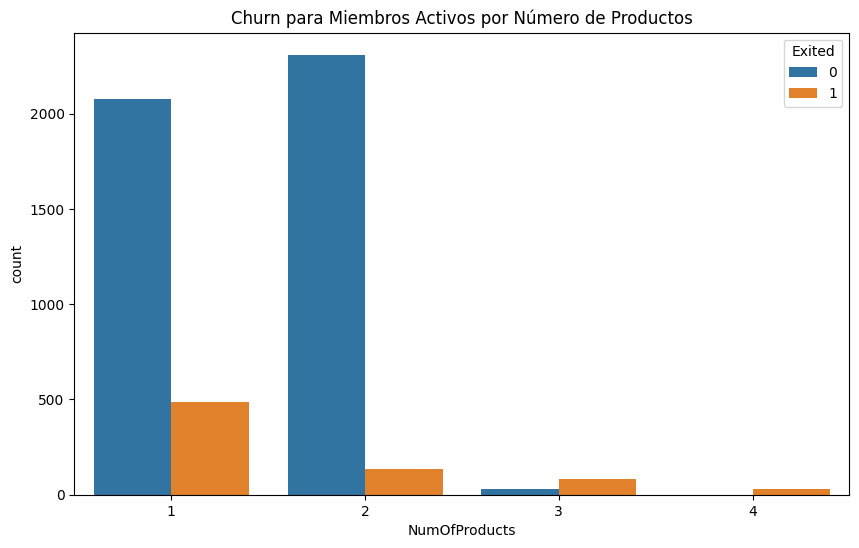

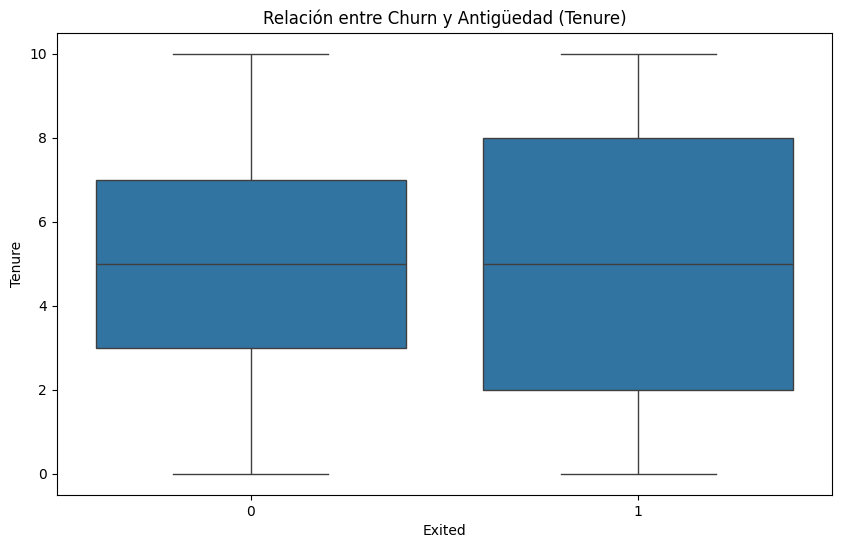

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Etapa 1: Revisión y Refinamiento del Análisis Exploratorio

# 1. Análisis Univariado Detallado

# a) Profundizar en la distribución de Balance

# Identificar clientes con Balance = 0
clientes_balance_cero = df[df['Balance'] == 0]
print("\n--- Análisis Detallado de Balance = 0 ---")
print(f"\nNúmero de clientes con Balance = 0: {len(clientes_balance_cero)}")
print("\nPorcentaje del total de clientes:")
print(len(clientes_balance_cero) / len(df) * 100)

# Analizar características demográficas y churn rate de este segmento
print("\nEstadísticas descriptivas de clientes con Balance = 0:")
print(clientes_balance_cero.describe())
print("\nChurn rate de clientes con Balance = 0:")
print(clientes_balance_cero['Exited'].mean() * 100)

# b) Analizar la distribución de Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribución de Edad con KDE')
plt.show()

# 2. Análisis Bivariado Avanzado

# a) Interacciones entre variables

# i) Age y Geography vs. Churn
plt.figure(figsize=(12, 7))
sns.boxplot(x='Geography', y='Age', hue='Exited', data=df)
plt.title('Relación entre Edad, Geografía y Churn')
plt.show()

# ii) NumOfProducts e IsActiveMember vs. Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df[df['IsActiveMember'] == 0])
plt.title('Churn para Miembros Inactivos por Número de Productos')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df[df['IsActiveMember'] == 1])
plt.title('Churn para Miembros Activos por Número de Productos')
plt.show()

# b) Análisis de Tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title('Relación entre Churn y Antigüedad (Tenure)')
plt.show()

# 3. Visualizaciones Interactivas Mejoradas

# a) Interactive Age vs. Balance vs. Exited con filtro por Geography
fig = px.scatter(df, x='Age', y='Balance', color='Exited', facet_col='Geography',
                  title='Relación Interactiva entre Edad, Saldo y Churn por Geografía',
                  labels={'Exited': 'Churn'},
                  category_orders={'Geography': ['France', 'Germany', 'Spain']})  # Ordenar los países
fig.show()


--- Análisis Detallado de Balance = 0 ---

Número de clientes con Balance = 0: 3617

Porcentaje del total de clientes:
36.17

Estadísticas descriptivas de clientes con Balance = 0:
       CreditScore          Age       Tenure  Balance  NumOfProducts  \
count  3617.000000  3617.000000  3617.000000   3617.0    3617.000000   
mean    649.452861    38.434891     5.071330      0.0       1.784628   
std      96.158798    10.492002     2.860781      0.0       0.496455   
min     350.000000    18.000000     0.000000      0.0       1.000000   
25%     583.000000    31.000000     3.000000      0.0       1.000000   
50%     651.000000    37.000000     5.000000      0.0       2.000000   
75%     717.000000    43.000000     7.000000      0.0       2.000000   
max     850.000000    88.000000    10.000000      0.0       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary       Exited  
count  3617.000000     3617.000000      3617.000000  3617.000000  
mean      0.716616        0.517832 

<ipython-input-12-8fafabd19289>:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-8fafabd19289>:36: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



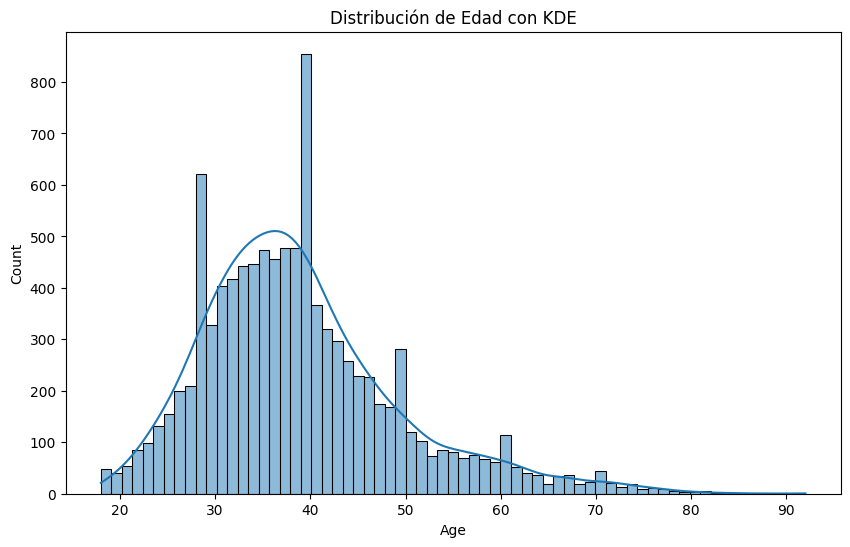

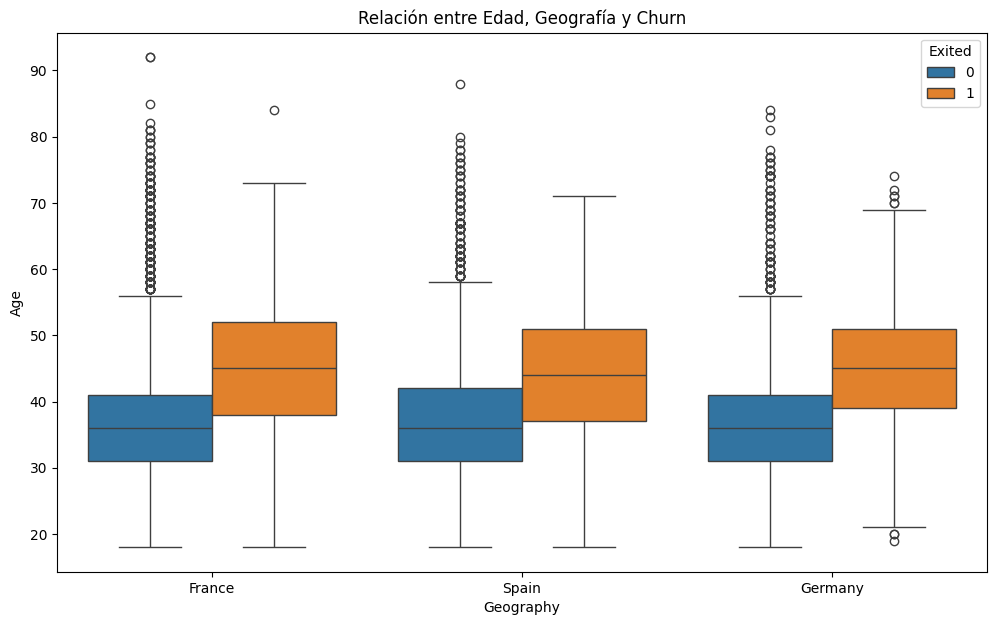

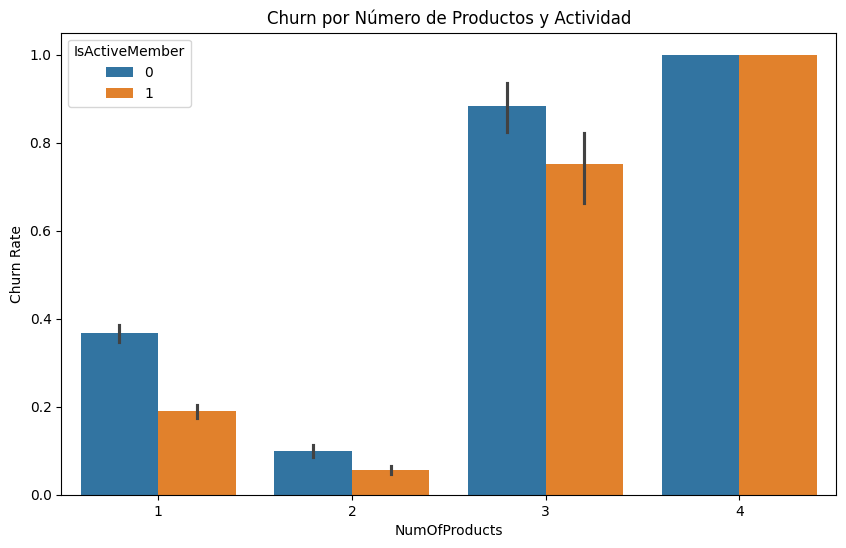

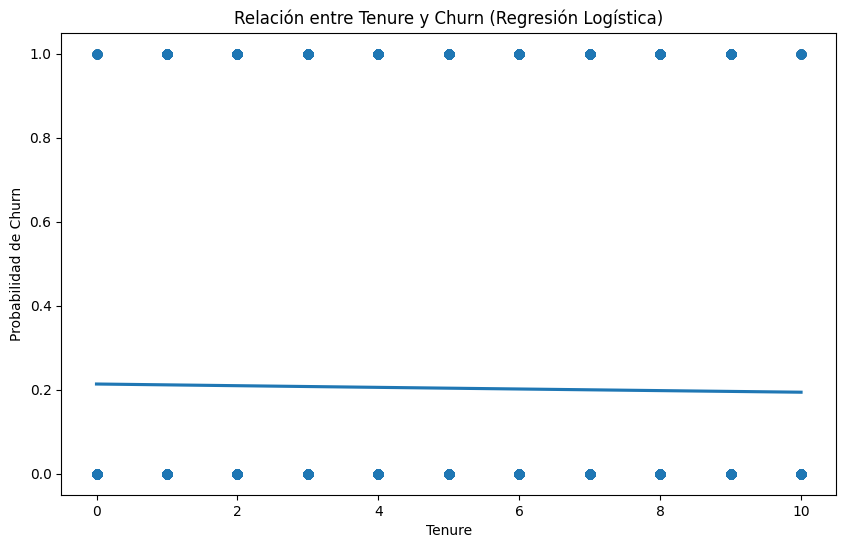

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression # Importamos LogisticRegression

# (Código de las Etapas previas aquí - omitido para brevedad)
# ...

# Etapa 1: Revisión y Refinamiento del Análisis Exploratorio

# 1. Análisis Univariado Detallado

# a) Profundizar en la distribución de Balance

# Identificar clientes con Balance = 0
clientes_balance_cero = df[df['Balance'] == 0]
print("\n--- Análisis Detallado de Balance = 0 ---")
print(f"\nNúmero de clientes con Balance = 0: {len(clientes_balance_cero)}")
print("\nPorcentaje del total de clientes:")
print(len(clientes_balance_cero) / len(df) * 100)

# Analizar características demográficas y churn rate de este segmento
print("\nEstadísticas descriptivas de clientes con Balance = 0:")
print(clientes_balance_cero.describe())
print("\nChurn rate de clientes con Balance = 0:")
print(clientes_balance_cero['Exited'].mean() * 100)

# Segmentación adicional dentro de Balance = 0
print("\nChurn rate de clientes con Balance = 0 y IsActiveMember:")
print(clientes_balance_cero.groupby('IsActiveMember')['Exited'].mean() * 100)

print("\nChurn rate de clientes con Balance = 0 por grupos de edad:")
clientes_balance_cero['Age_Group'] = pd.cut(clientes_balance_cero['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-29', '30-39', '40-49', '50-59', '60+'])
print(clientes_balance_cero.groupby('Age_Group')['Exited'].mean() * 100)

# Comparación con clientes con Balance > 0
clientes_balance_positivo = df[df['Balance'] > 0]
print("\nComparación Balance = 0 vs. Balance > 0")
print("\nMedia de Age:")
print(f"  Balance = 0: {clientes_balance_cero['Age'].mean():.2f}, Balance > 0: {clientes_balance_positivo['Age'].mean():.2f}")
print("\nMedia de CreditScore:")
print(f"  Balance = 0: {clientes_balance_cero['CreditScore'].mean():.2f}, Balance > 0: {clientes_balance_positivo['CreditScore'].mean():.2f}")
print("\nMedia de Tenure:")
print(f"  Balance = 0: {clientes_balance_cero['Tenure'].mean():.2f}, Balance > 0: {clientes_balance_positivo['Tenure'].mean():.2f}")


# b) Analizar la distribución de Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribución de Edad con KDE')
plt.show()

# 2. Análisis Bivariado Avanzado

# a) Interacciones entre variables

# i) Age y Geography vs. Churn
plt.figure(figsize=(12, 7))
sns.boxplot(x='Geography', y='Age', hue='Exited', data=df)
plt.title('Relación entre Edad, Geografía y Churn')
plt.show()

# ii) NumOfProducts e IsActiveMember vs. Churn (Gráfico de barras agrupado)
plt.figure(figsize=(10, 6))
sns.barplot(x='NumOfProducts', y='Exited', hue='IsActiveMember', data=df)
plt.title('Churn por Número de Productos y Actividad')
plt.ylabel('Churn Rate')  # Asegurarse de que el eje y esté claramente etiquetado
plt.show()


# b) Análisis de Tenure

# Análisis no lineal (Regresión Logística)
plt.figure(figsize=(10, 6))
sns.regplot(x='Tenure', y='Exited', data=df, logistic=True, ci=None)
plt.title('Relación entre Tenure y Churn (Regresión Logística)')
plt.ylabel('Probabilidad de Churn') # Asegurarse de que el eje y esté claramente etiquetado
plt.show()

# 3. Visualizaciones Interactivas Mejoradas

# a) Interactive Age vs. Balance vs. Exited con filtro por Geography
fig = px.scatter(df, x='Age', y='Balance', color='Exited', facet_col='Geography',
                  title='Relación Interactiva entre Edad, Saldo y Churn por Geografía',
                  labels={'Exited': 'Churn'},
                  category_orders={'Geography': ['France', 'Germany', 'Spain']})  # Ordenar los países
fig.show()

In [19]:
import pandas as pd
import numpy as np

# (Código de la Etapa 1 Refinada aquí - omitido para brevedad)
# ...

# Etapa 2: Ingeniería de Características

# 1. Creación de Nuevas Variables

# a) Variables de Interacción

# i) Age x Geography
df['Age_Geography'] = df['Age'].astype(str) + '_' + df['Geography']
# Codificar esta nueva variable categórica más adelante con OneHotEncoder

# ii) NumOfProducts x IsActiveMember
df['Products_Activity'] = df['NumOfProducts'].astype(str) + '_' + df['IsActiveMember'].astype(str)
# Codificar esta nueva variable categórica más adelante con OneHotEncoder

# b) Variables de Agrupación

# i) Age Group
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100],
                       labels=['18-29', '30-39', '40-49', '50-59', '60+'])
# Codificar esta nueva variable categórica más adelante si es necesario

# ii) Balance Group
# Crear grupos personalizados para 'Balance'
df['Balance_Group'] = 'Unknown'  # Valor por defecto para manejar casos inesperados

# Grupo para Balance = 0
df.loc[df['Balance'] == 0, 'Balance_Group'] = 'Zero'

# Calcular los cuartiles para Balance > 0 (excluyendo el 0)
balance_greater_than_0 = df['Balance'] > 0
if balance_greater_than_0.any():  # Verificar si hay algún Balance > 0
    quartiles = df.loc[balance_greater_than_0, 'Balance'].quantile([0.25, 0.5, 0.75]).to_list()
    df.loc[(df['Balance'] > 0) & (df['Balance'] <= quartiles[0]), 'Balance_Group'] = 'Q1'
    df.loc[(df['Balance'] > quartiles[0]) & (df['Balance'] <= quartiles[1]), 'Balance_Group'] = 'Q2'
    df.loc[(df['Balance'] > quartiles[1]) & (df['Balance'] <= quartiles[2]), 'Balance_Group'] = 'Q3'
    df.loc[df['Balance'] > quartiles[2], 'Balance_Group'] = 'Q4'
else:
    print("Advertencia: No hay saldos mayores que 0 en los datos.")

# Imprimir las primeras filas con las nuevas variables
print("\nDataFrame con nuevas variables:")
print(df.head())

# Imprimir información sobre las nuevas variables
print("\nInformación sobre las nuevas variables:")
print(df[['Age_Geography', 'Products_Activity', 'Age_Group', 'Balance_Group']].info())


DataFrame con nuevas variables:
   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited Age_Geography  \
0          1               1        101348.88       1     42_France   
1          0               1        112542.58       0      41_Spain   
2          1               0        113931.57       1     42_France   
3          0               0         93826.63       0     39_France   
4          1               1         79084.10       0      43_Spain   

  Products_Activity Age_Group Balance_Group  
0               1_1     40-49          Zero


Regresión Logística: AUC ROC = 0.8419

Árbol de Decisión: AUC ROC = 0.6776

Random Forest: AUC ROC = 0.8462

Gradient Boosting: AUC ROC = 0.8611

Mejores Hiperparámetros de Random Forest: {'modelo__max_depth': 7, 'modelo__min_samples_split': 5, 'modelo__n_estimators': 200}

--- Evaluación Detallada del Mejor Modelo (Random Forest) ---

Accuracy: 0.796

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.50      0.74      0.60       407

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



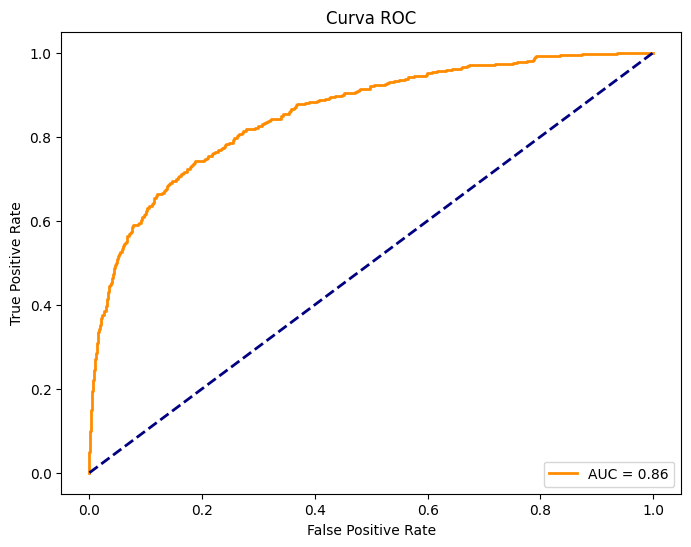

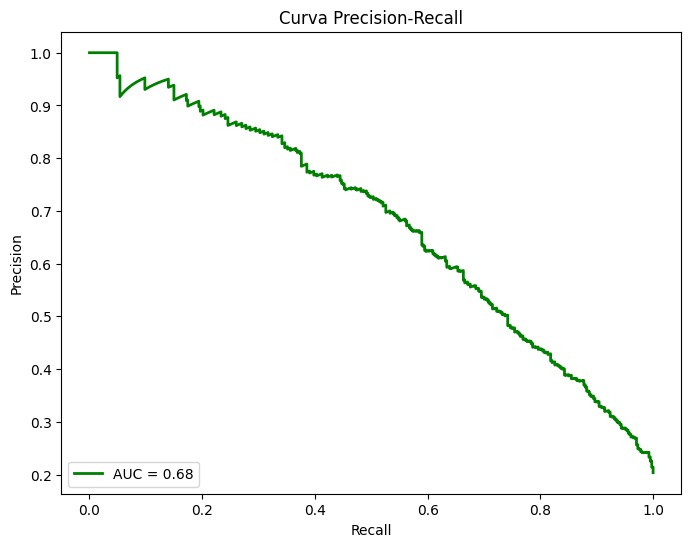

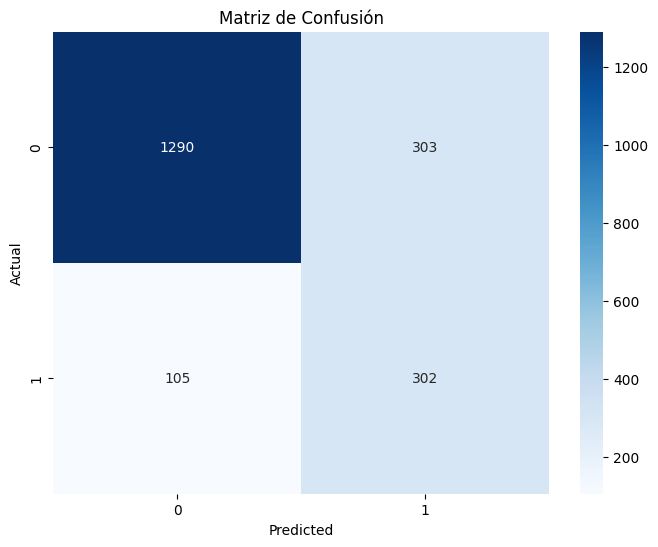

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc

# (Código de las Etapas 1-2 aquí - omitido para brevedad)
# ...

# Etapa 3: Modelado Avanzado

# 1. Selección de Modelos

# a) Preparar datos para modelado (si no se hizo en la Etapa 2)
# Identificar variables numéricas y categóricas
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
variables_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Excluir la variable objetivo 'Exited' de las variables numéricas
variables_numericas.remove('Exited')

# Crear un ColumnTransformer para aplicar transformaciones diferentes a columnas diferentes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),  # Escalar variables numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), variables_categoricas)  # Codificar variables categóricas
    ])

# Dividir los datos en conjuntos de entrenamiento y prueba (si no se hizo antes)
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y para mantener la proporción de clases

# Preprocesar los datos
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# b) Definir modelos
modelos = {
    'Regresión Logística': LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'),
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42) # Gradient Boosting no tiene 'class_weight'
}

resultados = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Stratified K-Fold para mantener la proporción de clases

# c) Entrenar y evaluar modelos
for nombre, modelo in modelos.items():
    pipeline = Pipeline(steps=[('modelo', modelo)])
    cv_scores = cross_val_score(pipeline, X_train_processed, y_train, cv=cv, scoring='roc_auc') # Usamos AUC para evaluar el rendimiento
    resultados[nombre] = cv_scores.mean()
    print(f"\n{nombre}: AUC ROC = {cv_scores.mean():.4f}")


# 2. Ajuste de Hiperparámetros (Ejemplo: Random Forest)

param_grid = {
    'modelo__n_estimators': [50, 100, 200],
    'modelo__max_depth': [3, 5, 7],
    'modelo__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(Pipeline(steps=[('modelo', RandomForestClassifier(random_state=42, class_weight='balanced'))]),
                           param_grid, cv=cv, scoring='roc_auc')

grid_search.fit(X_train_processed, y_train)

print("\nMejores Hiperparámetros de Random Forest:", grid_search.best_params_)
mejor_modelo_rf = grid_search.best_estimator_


# 3. Evaluación Detallada (Ejemplo: Mejor Random Forest)

y_pred_proba = mejor_modelo_rf.predict_proba(X_test_processed)[:, 1]
y_pred = mejor_modelo_rf.predict(X_test_processed)

print("\n--- Evaluación Detallada del Mejor Modelo (Random Forest) ---")
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.show()

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc

# (Código de las Etapas 1-3 aquí - omitido para brevedad)
# ...

# Etapa 4: Interpretación y Recomendaciones

# 1. Interpretación del Modelo

print("\n--- Interpretación del Modelo ---")

# a) Importancia de las Características (Ejemplo: Random Forest)

if 'RandomForestClassifier' in modelos:
    importancia_caracteristicas = mejor_modelo_rf.named_steps['modelo'].feature_importances_
    nombres_caracteristicas = X_train.columns.tolist() # Nombres originales antes del OneHotEncoding

    # Obtener los nombres de las características después del OneHotEncoding
    nombres_caracteristicas_transformadas = []
    for nombre, transformador, columnas in preprocessor.transformers_:
        if nombre == 'cat':
            nombres_caracteristicas_transformadas.extend(transformador.get_feature_names_out(input_features=columnas))
        elif nombre == 'num':
            nombres_caracteristicas_transformadas.extend(columnas)

    # Crear un DataFrame para mostrar la importancia de las características
    df_importancia = pd.DataFrame({'Característica': nombres_caracteristicas_transformadas, 'Importancia': importancia_caracteristicas})
    df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

    print("\nImportancia de las Características (Random Forest):")
    print(df_importancia.head(10))  # Mostrar las 10 características más importantes

    # Visualizar la importancia de las características
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importancia', y='Característica', data=df_importancia.head(10))
    plt.title('Importancia de las 10 Características Principales (Random Forest)')
    plt.show()

# 2. Recomendaciones Accionables

print("\n--- Recomendaciones Accionables ---")

print("\nBasado en el análisis y el modelado, se pueden formular las siguientes recomendaciones:")

# a) Estrategias de Retención Segmentadas

print("\n- Estrategias de Retención Segmentadas:")

# Segmento 1: Clientes en Alemania
print("\n  - Segmento 1: Clientes en Alemania")
print("    - La alta tasa de churn en Alemania requiere una investigación urgente de las causas subyacentes (competencia, problemas de servicio localizados, etc.).")
print("    - Implementar campañas de retención específicas para los clientes alemanes, destacando los beneficios del banco y abordando sus preocupaciones.")

# Segmento 2: Clientes Inactivos
print("\n  - Segmento 2: Clientes Inactivos")
print("    - La inactividad es un fuerte predictor de churn. Implementar programas de reactivación para clientes inactivos, ofreciendo incentivos o recordándoles los beneficios de los productos del banco.")

# Segmento 3: Clientes de Mediana Edad
print("\n  - Segmento 3: Clientes de Mediana Edad (40-59 años)")
print("    - Este grupo muestra una mayor propensión al churn. Ofrecer productos o servicios adaptados a sus necesidades financieras (planificación de jubilación, inversiones, etc.).")

# Segmento 4: Clientes con Saldo Cero
print("\n  - Segmento 4: Clientes con Saldo Cero")
print("    - Aunque la tasa de churn general para este grupo no es la más alta, es un segmento grande. Investigar las razones detrás de los saldos cero y ofrecer incentivos para aumentar la actividad de la cuenta.")

# b) Mejoras en Productos y Servicios

print("\n- Mejoras en Productos y Servicios:")

# Productos con baja adopción
print("\n  - Productos con Baja Adopción")
print("    - Investigar las razones detrás de la baja adopción de ciertos productos y considerar mejoras o simplificaciones.")

# c) Campañas de Marketing Dirigidas

print("\n- Campañas de Marketing Dirigidas:")

# Campañas personalizadas
print("\n  - Campañas Personalizadas")
print("    - Utilizar los insights del modelo para identificar a los clientes con mayor riesgo de churn y lanzar campañas de marketing proactivas para retenerlos.")

# 3. Limitaciones y Futuras Investigaciones

print("\n--- Limitaciones y Futuras Investigaciones ---")

print("\n- El análisis se basa en datos históricos y no puede predecir eventos futuros imprevistos.")
print("- El modelo no captura completamente la complejidad del comportamiento humano y las razones detrás del churn.")
print("- Futuras investigaciones podrían incluir:")
print("  - Recopilación de datos adicionales (interacciones con el banco, quejas, etc.).")
print("  - Análisis de series temporales para identificar tendencias en el churn.")
print("  - Pruebas A/B de diferentes estrategias de retención.")


--- Interpretación del Modelo ---

--- Recomendaciones Accionables ---

Basado en el análisis y el modelado, se pueden formular las siguientes recomendaciones:

- Estrategias de Retención Segmentadas:

  - Segmento 1: Clientes en Alemania
    - La alta tasa de churn en Alemania requiere una investigación urgente de las causas subyacentes (competencia, problemas de servicio localizados, etc.).
    - Implementar campañas de retención específicas para los clientes alemanes, destacando los beneficios del banco y abordando sus preocupaciones.

  - Segmento 2: Clientes Inactivos
    - La inactividad es un fuerte predictor de churn. Implementar programas de reactivación para clientes inactivos, ofreciendo incentivos o recordándoles los beneficios de los productos del banco.

  - Segmento 3: Clientes de Mediana Edad (40-59 años)
    - Este grupo muestra una mayor propensión al churn. Ofrecer productos o servicios adaptados a sus necesidades financieras (planificación de jubilación, inversione